In [1]:
import pandas as pd
import numpy as np
import os as os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [5]:
import os
import cv2

train_dir = '/content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/train'

categories = ["glioma", "meningioma", "notumor", "pituitary"]


PREPROCESSING FOR TRAINING DATA

In [6]:
size_threshold = (10,10)
valid_extensions=('.jpg', '.png', '.jpeg')

def is_image_corrupt(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return True
        return False
    except:
        return True


def is_image_below_threshold(img_path):
    img = cv2.imread(image_path)
    if img.shape <= size_threshold:
        print(img.shape)
        return True
    return False

for each_category in categories:
    folder_path = os.path.join(train_dir, each_category)
    for each_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, each_file)
        if os.path.isfile(image_path) and each_file.lower().endswith(valid_extensions):
            if is_image_corrupt(image_path) or is_image_below_threshold(image_path):
                os.remove(image_path)
                print(f"Removed corrupt image: {each_file}")

VISUALIZING DISTRIBUTION OF CLASSES


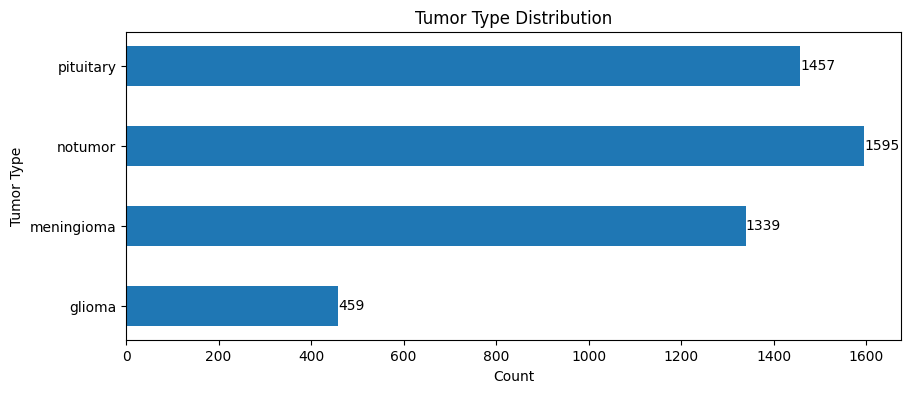

In [7]:
import matplotlib.pyplot as plt
import os

train_dir = '/content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/train'
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["glioma", "meningioma", "notumor", "pituitary"]
category_count = {}

for each_category in categories:
    folder_path = os.path.join(train_dir, each_category)
    valid_images = [file for file in os.listdir(folder_path) if file.lower().endswith(valid_extensions)]
    category_count[each_category] = len(valid_images)

fig, ax = plt.subplots(figsize=(10, 4))

# Bar chart
bar_plot = plt.barh(list(category_count.keys()), list(category_count.values()), 0.5)
plt.title('Tumor Type Distribution')
plt.xlabel('Count')
plt.ylabel('Tumor Type')
for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(list(category_count.values())[i]), ha='left', va='center')

plt.show()





VISUALIZING PERCENTAGE OF CLASSES

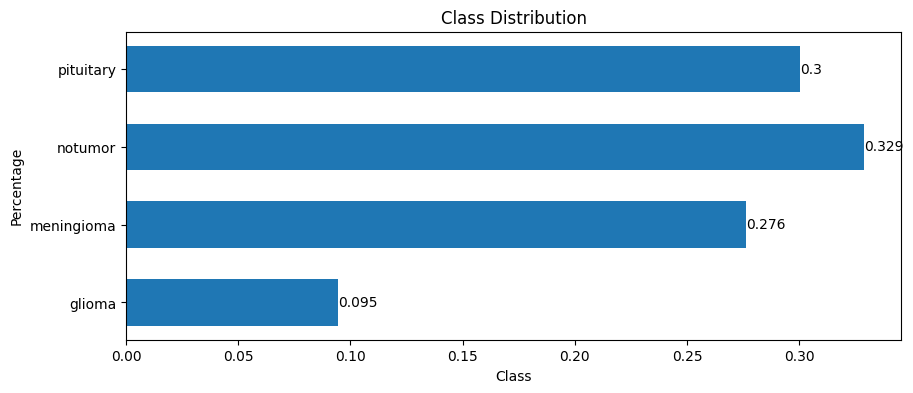

In [8]:
sample_size = sum(category_count.values())

class_dist = {key : val/sample_size for key, val in category_count.items()}


fig, ax = plt.subplots(figsize=(10, 4))


# Bar chart
bar_plot = plt.barh(list(class_dist.keys()), list(class_dist.values()), 0.6)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(round(list(class_dist.values())[i], 3)), ha='left', va='center')

plt.show()

VISUALIZING SAMPLE IMAGES IN THE TRAINING DATA


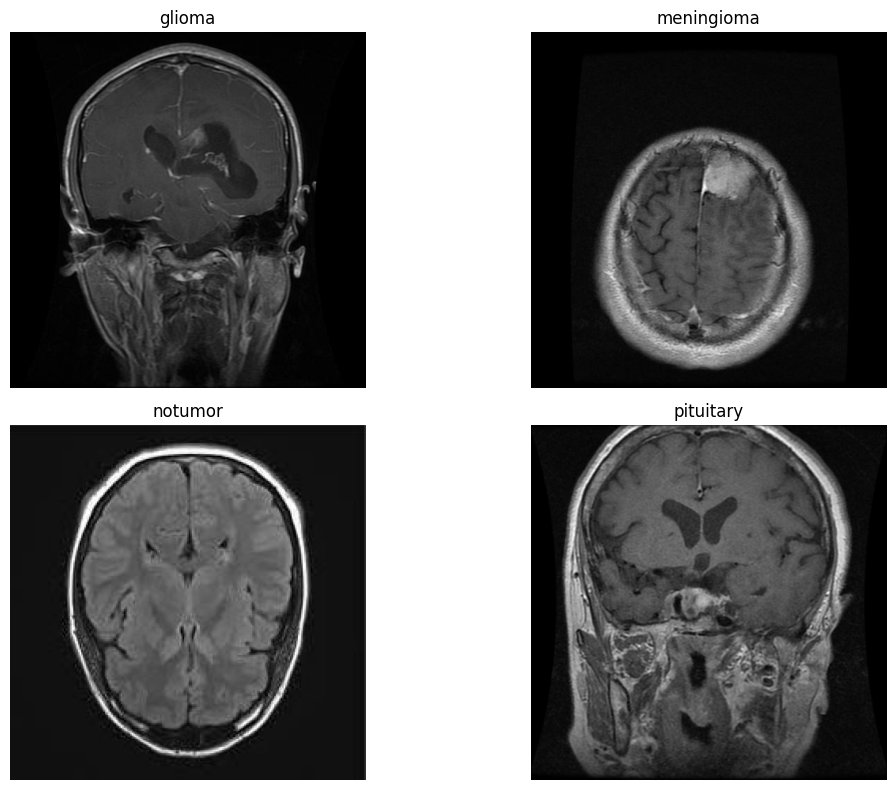

In [9]:
import matplotlib.pyplot as plt
import os
train_dir = '/content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/train'
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["glioma", "meningioma", "notumor", "pituitary"]

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    if not image_path.lower().endswith(valid_extensions):
        continue
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

LOADING THE YOLO PRETRAINED MODEL


In [10]:
from ultralytics import YOLO

model = YOLO('yolov8m-cls.pt')  # load a pretrained YOLOv8n classification model



100%|██████████| 32.7M/32.7M [00:00<00:00, 40.3MB/s]


TRAINING MODEL WITH CUSTOM BRAIN DATASET

In [14]:
# train/pre-tuned the model on our dataset
model.train(data='/content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)', epochs=10)

# run the model on test data
res = model.val()
#model.save('./runs/train/exp/weights/best.pt')

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2), epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 6.25M/6.25M [00:00<00:00, 343MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/train... 4850 images, 0 corrupt: 100%|██████████| 4850/4850 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/val... 1020 images, 0 corrupt: 100%|██████████| 1020/1020 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


       1/10      1.01G      1.409         16        224:   2%|▏         | 5/304 [00:02<01:35,  3.14it/s]

       1/10      1.01G      1.415         16        224:   3%|▎         | 8/304 [00:03<01:30,  3.29it/s]
100%|██████████| 755k/755k [00:00<00:00, 49.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [04:54<00:00,  9.20s/it]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:09<00:00,  3.42it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:09<00:00,  3.43it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:06<00:00,  4.63it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.05G    0.03438          2        224: 100%|██████████| 304/304 [01:06<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]

                   all      0.998          1



10 epochs completed in 0.310 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train/weights/best.pt, 31.7MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/train... found 4850 images in 4 classes ✅ 
val: /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/val... found 1020 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]


                   all      0.998          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/train... found 4850 images in 4 classes ✅ 
val: /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/val... found 1020 images in 4 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/archive (2)/val... 1020 images, 0 corrupt: 100%|██████████| 1020/1020 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 64/64 [00:14<00:00,  4.49it/s]


                   all      0.998          1
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


EVALUATION OF FINETUNED MODEL

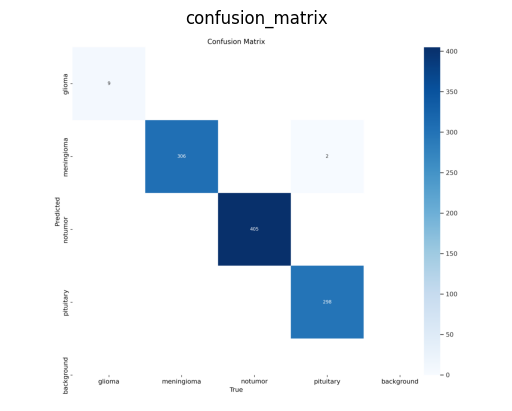

In [15]:
image_path2='/content/runs/classify/train/confusion_matrix.png'
img2=plt.imread(image_path2)
plt.imshow(img2)
plt.title('confusion_matrix')
plt.axis("off")
plt.show()

NOMALIZED CONFUSION MATRIX TO EVALUATE PERFORMANCE

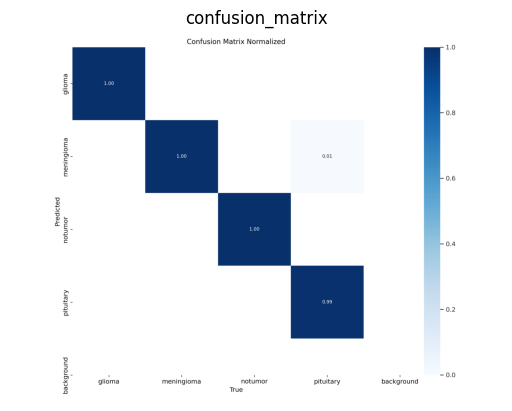

In [17]:
image_path2='/content/runs/classify/train/confusion_matrix_normalized.png'
img2=plt.imread(image_path2)
plt.imshow(img2)
plt.title('confusion_matrix')
plt.axis("off")
plt.show()

**From the matrix**:

**Glioma**: The model correctly predicted 9 instances as glioma. There is no indication of misclassifications in this class.
**Meningioma**: There were 306 correct predictions for meningioma and 2 instances misclassified as notumor.
**Notumor**: The model correctly predicted 405 instances as notumor.
**Pituitary**: There were 298 correct predictions for pituitary.
The confusion matrix shows a good performance with most of the predictions falling on the diagonal, indicating correct classifications. The color gradient from light to dark blue indicates the count, with darker colors representing a higher number of correct predictions. Misclassifications are represented by off-diagonal values. There are a few misclassifications, such as meningioma being predicted as notumor in 2 instances.

Overall, the model appears to perform well, particularly for the notumor and pituitary classes, with relatively few errors.

In [18]:
# Load the saved model
#model = YOLO('/content/drive/MyDrive/DATASET_AI_PROJECT/Brain_Tumor_Dataset/trained_model.pt')
model = YOLO('./runs/classify/train/weights/best.pt')

PREDICTION USING THE MODEL

In [19]:
from google.colab import files


In [20]:
pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 10.9 MB/s eta 0:00:00


In [21]:
import cv2
from matplotlib import pyplot as plt
import supervision as sv
def read_and_detect():
  uploaded = files.upload()
# Assuming only one image is uploaded, get the file name
  image_path = next(iter(uploaded))  # Get the filename of the uploaded image

  # Load the image
  image = cv2.imread(image_path)

  # Convert the image to RGB (YOLO expects RGB images)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Perform inference
  results = model.predict(image_rgb,save=True)
  result = results[0]

  # Extract class names and probabilities
  class_names = result.names
  probs = result.probs.data.tolist()  # Convert probabilities to list
  max_prob_index = np.argmax(probs)   # Index of highest probability
  class_name = class_names[max_prob_index].upper()  # Get the class name with the highest probability
  confidence_score = probs[max_prob_index]  # Get the confidence score


  # If you want to show the image with the prediction overlay, you can use matplotlib
  plt.imshow(image_rgb)
  plt.title(f"The outcome of the prediction is {class_name} and the model has a confidence score of {confidence_score:.2f}")
  plt.axis('off')
  plt.show()
  return class_name

In [22]:

!pip install openai==0.28



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.9 MB/s eta 0:00:00


In [23]:
import openai

In [24]:
def get_tumor_info(tumor_type):
    openai.api_key = api_key # Replace with your API key

    prompt = f"Please provide detailed information about {tumor_type}. Include symptoms, treatment options, and general facts."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content']


Saving image(89).jpg to image(89).jpg

0: 224x224 meningioma 0.99, notumor 0.01, glioma 0.00, pituitary 0.00, 7.6ms
Speed: 5.6ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


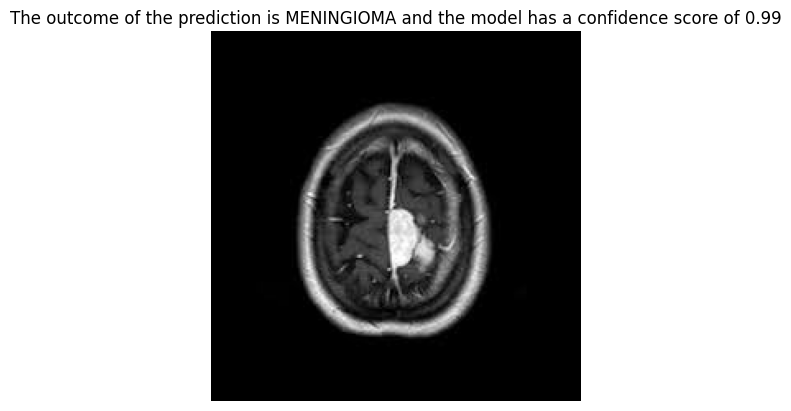

Unfortunately a tumour was detected, but don't panick, we will educate you on the type of brain tumor detected and how to seek help:

Meningioma is a type of tumor that originates from the meninges, which are the layers of tissue that cover the brain and spinal cord. Here is some detailed information about meningioma:

Symptoms:
1. Headaches: Persistent headaches that may worsen over time.
2. Seizures: Meningiomas can cause seizures, especially if they are located in certain areas of the brain.
3. Weakness or numbness: Depending on the location of the tumor, weakness or numbness in certain parts of the body may occur.
4. Changes in vision: Blurred vision or vision loss can be a symptom of meningioma.
5. Cognitive changes: Memory problems, confusion, or other cognitive changes may also occur.

Treatment options:
1. Observation: In cases where the meningioma is small and not causing any symptoms, doctors may choose to monitor the tumor periodically with imaging tests.
2. Surgery: The mos

In [30]:
classname=read_and_detect()
if classname == 'NOTUMOR':
  print("CONGRTULATIONS YOU DO NOT HAVE ANY TUMOUR DETECTED IN YOUR IMAGE SCAN!!!")
else:
  tumor_info = get_tumor_info(classname)
  print("Unfortunately a tumour was detected, but don't panick, we will educate you on the type of brain tumor detected and how to seek help:\n")
  print(tumor_info)